In [1]:
#model evaluation: 
#The original thought is to compare the MSEs of different models with that of PCA model

In [2]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
bodyfat_raw <- read.csv("BodyFat.csv")
bodyfat <- bodyfat_raw[,-c(1,3)] #rule out density

In [4]:
#rule out of outliers
outliers <- c(39,42,86,172,182,216,221) 
bodyfat <- bodyfat[-outliers, ]

In [5]:
#use all variables
accs <- rep(0,3)

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)

  train <- bodyfat[-indices,]
  test <- bodyfat[indices,]
  
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  pred_y=predict(model, test[,-1])
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_all=mean(accs))

[1] 17.15962

In [6]:
#PCA
accs <- rep(0,3)

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
    #(((i-1) * round((1/3)*nrow(bodyfat))) + 1):((i*round((1/3) * nrow(bodyfat))))
  
  train <- bodyfat[indices,]
  test <- bodyfat[-indices,]
  
  model <- prcomp(train[,-1])
  train$PC1=as.numeric(predict(model,train[,-1])[,1])
  train$PC2=as.numeric(predict(model,train[,-1])[,2])
  train$PC3=as.numeric(predict(model,train[,-1])[,3])
  m1=lm(BODYFAT~PC1+PC2+PC3,data=train)
  cov=as.data.frame(predict(model,test[,-1])[,1:3])
  new=data.frame(PC1=cov$PC1,PC2=cov$PC2,PC3=cov$PC3)
  pred_y=predict(m1,newdata = new)
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_pca=mean(accs))

[1] 16.42956

In [7]:
#mallow's cp
accs <- rep(0,3)
cp.choice <- c(2,7,13,14)+1
bodyfat_cp <- bodyfat[,c(1,cp.choice)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)

  train <- bodyfat_cp[indices,]
  test <- bodyfat_cp[-indices,]
  
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  pred_y=predict(model, test[,-1])
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_cp=mean(accs))

[1] 14.72891

In [8]:
#r2
accs <- rep(0,3)
r2.choice <- c(2,3,6,8,9,10,14,15)
bodyfat_r2 <-bodyfat[,c(1,r2.choice)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
  train <- bodyfat_r2[indices,]
  test <- bodyfat_r2[-indices,]
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  pred_y=predict(model, test[,-1])
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_r2=mean(accs))

[1] 14.5669

In [9]:
#AIC back
accs <- rep(0,3)
aic.back.choice <- c(2,3,8,10,14,15)
bodyfat_aic.back <-bodyfat[,c(1,aic.back.choice)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
  train <- bodyfat_aic.back[indices,]
  test <- bodyfat_aic.back[-indices,]
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  pred_y=predict(model, test[,-1])
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_aic.back=mean(accs))

[1] 14.19855

In [10]:
#BIC back
accs <- rep(0,3)
bic.back.choice <- c(3,8,15)
bodyfat_bic.back <-bodyfat[,c(1,bic.back.choice)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
  train <- bodyfat_bic.back[indices,]
  test <- bodyfat_bic.back[-indices,]
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  pred_y=predict(model, test[,-1])
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_bic.back=mean(accs))

[1] 15.10356

In [11]:
#weight
accs <- rep(0,3)
weight <- c(3)
bodyfat_weight <-bodyfat[,c(1,weight)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
  train <- bodyfat_weight[indices,]
  test <- bodyfat_weight[-indices,]
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  new=data.frame(WEIGHT=test[,-1])
  pred_y=predict.lm(model, new)
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_weight=mean(accs))

[1] 36.057

In [12]:
#height
accs <- rep(0,3)
height <- c(4)
bodyfat_height <-bodyfat[,c(1,height)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
  train <- bodyfat_height[indices,]
  test <- bodyfat_height[-indices,]
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  new=data.frame(HEIGHT=test[,-1])
  pred_y=predict.lm(model, new)
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_height=mean(accs))

[1] 61.19266

In [13]:
#abdomen
accs <- rep(0,3)
abdomen <- c(8)
bodyfat_abdomen <-bodyfat[,c(1,abdomen)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
  train <- bodyfat_abdomen[indices,]
  test <- bodyfat_abdomen[-indices,]
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  new=data.frame(ABDOMEN=test[,-1])
  pred_y=predict.lm(model, new)
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_abdomen=mean(accs))

[1] 17.79949

In [14]:
#abdomen_wrist
accs <- rep(0,3)
abdomen_wrist <- c(8,15)
bodyfat_abdomen_wrist <-bodyfat[,c(1,abdomen_wrist)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
  train <- bodyfat_abdomen_wrist[indices,]
  test <- bodyfat_abdomen_wrist[-indices,]
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  pred_y=predict(model, test[,-1])
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_abdomen_wrist=mean(accs))

[1] 15.85212

In [15]:
#aic forward: selected 14 variable, so we don't consider it
#bic forward: selected 14 variable, so we don't consider it

#aic_stepwise same with aic_back
#bic_stepwise same with bic_back

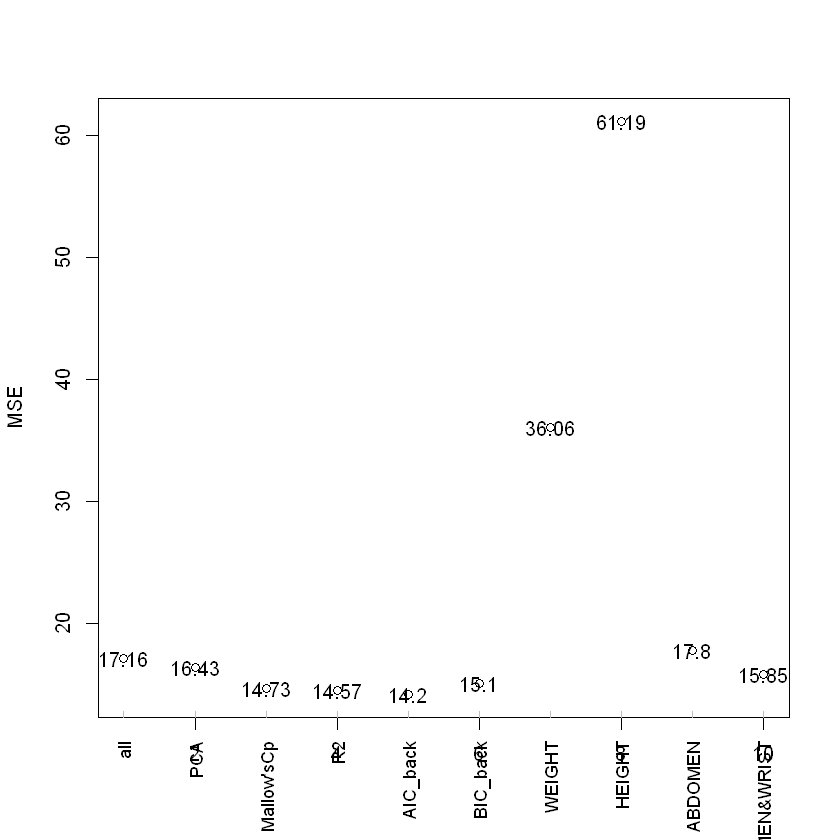

In [16]:
plot(c(acc_all,acc_pca,acc_cp,acc_r2,acc_aic.back,acc_bic.back,acc_weight,acc_height,acc_abdomen,acc_abdomen_wrist),xlab="",ylab="MSE")
axis(1, at=1:10, labels=c("all","PCA","Mallow'sCp","R2","AIC_back","BIC_back","WEIGHT","HEIGHT","ABDOMEN","ABDOMEN&WRIST"), tck=.01, cex.axis=0.9, srt=45, col.ticks = "grey", las=2)
text(x=1:10,y=c(acc_all,acc_pca,acc_cp,acc_r2,acc_aic.back,acc_bic.back,acc_weight,acc_height,acc_abdomen,acc_abdomen_wrist),
    labels=as.character(round(c(acc_all,acc_pca,acc_cp,acc_r2,acc_aic.back,acc_bic.back,acc_weight,acc_height,acc_abdomen,acc_abdomen_wrist),2)))